In [87]:
import os
import pandas as pd
import zipfile
def load_competition_data():
    zip_file_path = "./titanic.zip"
    with zipfile.ZipFile(zip_file_path, "r") as titanic_zip:
        titanic_zip.extractall(path="datasets")
    return pd.read_csv("datasets/train.csv", index_col="PassengerId")

def load_testing_data():
    return pd.read_csv("datasets/test.csv", index_col="PassengerId")

In [2]:
titanic_train = load_competition_data()

Naturalmente veremos nuestro dataset para ver con qué estamos trabajando

In [3]:
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Parece que este 

Parece que hay demasiados valores no númericos diferentes, 

Esta categoría parece ser categórica y tiene muchos valores únicos, por lo que no resultaría conveniente codificarla de manera númerica, ya sea separando cada valor único en una columna porque esto generaría muchas columnas, ni asignar un valor númerico a cada valor ya que el ordenamiento de los números sería arbitrario.

In [4]:
titanic_train["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [5]:
titanic_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
titanic_train["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Parece que tenemos demasiados valores vacios, es probable que sea más conveniente simplemente deshacernos de esta columna

In [7]:
len(titanic_train.loc[pd.isna(titanic_train["Cabin"])])

687

In [8]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_train_labels = titanic_train["Survived"].copy()
titanic_train_without_labels = titanic_train.drop("Survived", axis=1)

Parece que tenemos muchas categorias no númericas y muchas valores faltantes, ahora haremos un histograma para poder visualizar los datos

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

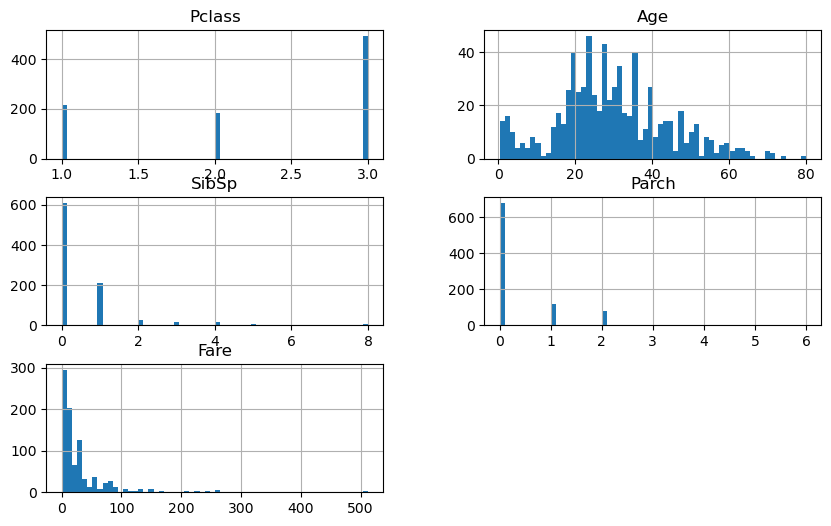

In [10]:
import matplotlib as plt
titanic_train_without_labels.hist(bins=60, figsize=(10,6))

Primero nos deshacemos de las 2 columnas problematicas

In [11]:
titanic_train_selected = titanic_train_without_labels.drop(["Cabin", "Ticket", "Name"], axis=1)
titanic_train_selected


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,NaN,1,2,23.4500,S


In [12]:
titanic_train_selected.shape

(891, 7)

In [13]:
null_values_per_column = titanic_train_selected.isna().sum(axis=0)
null_values_per_column

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Ahora haremos una pipeline, tendremos que separar sexo en dos categorias, al igual que embarked, que tiene que ser transformado en númerico y separado en 3 categorias, estandarizar fare utilizando logaritmo para hacerla más normal, aparte de eso tenemos valores nulos en age y en embarked

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [48]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, validate=False, feature_names_out="one-to-one"),
    StandardScaler()
)

sex_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)

embarked_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

age_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent")
)


In [49]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, ["Fare"]),
    ("sex", sex_pipeline, ["Sex"]),
    ("embarked", embarked_pipeline, ["Embarked"]),
    ("age", age_pipeline, ["Age"])
],
    remainder="passthrough"   # keep all other columns
)

In [50]:
titanic_train_prepared = preprocessing.fit_transform(titanic_train_selected)
titanic_train_prepared.shape

(891, 9)

In [51]:
preprocessing.get_feature_names_out()

array(['num__Fare', 'sex__Sex', 'embarked__Embarked_C',
       'embarked__Embarked_Q', 'embarked__Embarked_S', 'age__Age',
       'remainder__Pclass', 'remainder__SibSp', 'remainder__Parch'],
      dtype=object)

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = make_pipeline(preprocessing, DecisionTreeClassifier())
tree_classifier.fit(titanic_train_selected, titanic_train_labels)

,steps,"[('columntransformer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('sex', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [68]:
tree_classifier_predictions = tree_classifier.predict(titanic_train_selected)
tree_classifier_predictions[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [54]:
titanic_train_labels.iloc[:10].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [69]:
from sklearn.metrics import brier_score_loss
dec_tree_loss = brier_score_loss(titanic_train_labels, tree_classifier_predictions)
dec_tree_loss

0.019079685746352413

Este número es bastante bueno! Pero debemos preguntarnos si hay overfitting en el modelo, intentaremos cross validation para verificar más a profundidad

In [56]:
from sklearn.model_selection import cross_val_score
dec_trees_loss = cross_val_score(tree_classifier, titanic_train_selected, titanic_train_labels, scoring="f1", cv=6)
pd.Series(dec_trees_loss).describe()

count    6.000000
mean     0.721345
std      0.043160
min      0.649573
25%      0.703211
50%      0.730140
75%      0.754727
max      0.761062
dtype: float64

Como podemos ver obtenemos un score de ~.72, recordemos que este score va entre 0 y 1 y mientras más alto sea el score, mejor es nuestro modelo. Esto es bastante bueno, pero quizá se puede mejorar moviendo los valores de los híperparametros, haremos esto utilizando grid search.

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": [3, 5, 10, None],
    "decisiontreeclassifier__min_samples_split": [2, 5, 10, 20],
    "decisiontreeclassifier__min_samples_leaf": [1, 2, 5, 10],
    "decisiontreeclassifier__max_features": ["sqrt", "log2", .5, None],
    "decisiontreeclassifier__criterion": ["gini", "entropy", "log_loss"],
    "decisiontreeclassifier__class_weight": [None, "balanced"]
}

grid_search = GridSearchCV(tree_classifier, param_grid, cv=6, scoring="f1", n_jobs=1)
grid_search.fit(titanic_train_selected, titanic_train_labels)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'decisiontreeclassifier__class_weight': [None, 'balanced'], 'decisiontreeclassifier__criterion': ['gini', 'entropy', ...], 'decisiontreeclassifier__max_depth': [3, 5, ...], 'decisiontreeclassifier__max_features': ['sqrt', 'log2', ...], ...}"
,scoring,'f1'
,n_jobs,1
,refit,True
,cv,6
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('sex', ...), ...]"


In [58]:
grid_search.best_params_

{'decisiontreeclassifier__class_weight': 'balanced',
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__min_samples_leaf': 2,
 'decisiontreeclassifier__min_samples_split': 10}

In [59]:
grid_search.best_score_

0.7640551978629366

Este score ya es bastante satisfactorio pero probaremos otro modelo, a ver si podemos mejorar aún más.

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline

gradient_classifier = make_pipeline(
    preprocessing,
    GradientBoostingClassifier()   
)

gradient_classifier.fit(titanic_train_selected, titanic_train_labels)

,steps,"[('columntransformer', ...), ('gradientboostingclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('sex', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
gradient_predictions = gradient_classifier.predict(titanic_train_selected)

In [77]:
from sklearn.metrics import brier_score_loss
gradient_classifier_loss = brier_score_loss(titanic_train_labels, gradient_predictions)
gradient_classifier_loss

0.09876543209876543

In [78]:
gradient_model_loss = cross_val_score(gradient_classifier, titanic_train_selected, titanic_train_labels, scoring="f1", cv=6)
pd.Series(gradient_model_loss).describe()

count    6.000000
mean     0.758909
std      0.056113
min      0.700000
25%      0.729421
50%      0.732732
75%      0.802940
max      0.833333
dtype: float64

In [83]:
param_grid_gradient = {
    "gradientboostingclassifier__n_estimators": [100, 300],
    "gradientboostingclassifier__learning_rate": [0.05, 0.1],
    "gradientboostingclassifier__max_depth": [3, 4],
    "gradientboostingclassifier__min_samples_leaf": [1, 3],
    "gradientboostingclassifier__max_features": ["sqrt", "log2", None],
    "gradientboostingclassifier__subsample": [.8, 1.0]
}

grid_search_gradient = GridSearchCV(gradient_classifier, param_grid_gradient, cv=6, scoring="f1", n_jobs=1)
grid_search_gradient.fit(titanic_train_selected, titanic_train_labels)

,estimator,Pipeline(step...lassifier())])
,param_grid,"{'gradientboostingclassifier__learning_rate': [0.05, 0.1], 'gradientboostingclassifier__max_depth': [3, 4], 'gradientboostingclassifier__max_features': ['sqrt', 'log2', ...], 'gradientboostingclassifier__min_samples_leaf': [1, 3], ...}"
,scoring,'f1'
,n_jobs,1
,refit,True
,cv,6
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('sex', ...), ...]"


In [84]:
grid_search_gradient.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__min_samples_leaf': 3,
 'gradientboostingclassifier__n_estimators': 100,
 'gradientboostingclassifier__subsample': 0.8}

In [86]:
grid_search_gradient.best_score_

0.774882785459971

In [89]:
titanic_test = load_testing_data()
titanic_test_selected = titanic_test.drop(["Cabin", "Ticket", "Name"], axis=1)
titanic_test_selected

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [95]:
grid_search_test_predictions = grid_search_gradient.predict(titanic_test_selected)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": titanic_test_selected["PassengerId"],
    "Survived": grid_search_test_predictions
})

KeyError: 'PassengerId'